In [4]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [5]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [6]:
!pip install kaggle

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------- ----------------------------- 1/4 [tqdm]
   ---------- ----------------------------- 1/4 [tqdm]
   ---------- ----------------------------- 1/4 [tqdm]
   -------------------- ------------------- 2/4 [python-slugify]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ---------------------------------------- 4/4 [kaggle]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
kaggle_credentials = json.load(open('kaggle.json'))

In [8]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [9]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset


  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  1%|          | 16.0M/2.04G [00:00<00:13, 166MB/s]
  2%|▏         | 32.0M/2.04G [00:00<00:13, 158MB/s]
  2%|▏         | 48.0M/2.04G [00:00<00:14, 152MB/s]
  3%|▎         | 63.0M/2.04G [00:00<00:14, 143MB/s]
  4%|▍         | 81.0M/2.04G [00:00<00:14, 150MB/s]
  5%|▍         | 104M/2.04G [00:00<00:11, 177MB/s] 
  7%|▋         | 137M/2.04G [00:00<00:08, 228MB/s]
  8%|▊         | 167M/2.04G [00:00<00:07, 253MB/s]
  9%|▉         | 197M/2.04G [00:00<00:07, 270MB/s]
 11%|█         | 227M/2.04G [00:01<00:06, 283MB/s]
 12%|█▏        | 255M/2.04G [00:01<00:07, 270MB/s]
 14%|█▎        | 283M/2.04G [00:01<00:07, 269MB/s]
 15%|█▍        | 309M/2.04G [00:01<00:07, 263MB/s]
 16%|█▌        | 338M/2.04G [00:01<00:06, 274MB/s]
 17%|█▋        | 365M/2.04G [00:01<00:06, 267MB/s]
 19%|█▉        | 397M/2.04G [00:01<00:06, 286MB/s]
 20%|██        | 425M/2.04G [00:01<00:06, 253MB/s]
 22%|██▏       | 450M/2.04G [00:01<00:06, 255MB/s]
 23%|██▎       | 479M/2.04G [00


License(s): CC-BY-NC-SA-4.0



In [11]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
with ZipFile("plantvillage-dataset.zip") as zip_ref:
    zip_ref.extractall()

In [13]:
print(os.listdir("plantvillage_dataset"))

print(len(os.listdir("plantvillage_dataset/segmented")))
print(os.listdir("plantvillage_dataset/segmented")[:5])

print(len(os.listdir("plantvillage_dataset/color")))
print(os.listdir("plantvillage_dataset/color")[:5])

print(len(os.listdir("plantvillage_dataset/grayscale")))
print(os.listdir("plantvillage_dataset/grayscale")[:5])


['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [14]:
print(len(os.listdir("plantvillage_dataset/color/Apple___healthy")))
print(os.listdir("plantvillage_dataset/color/Apple___healthy")[:5])

1645
['0055dd26-23a7-4415-ac61-e0b44ebfaf80___RS_HL 5672.JPG', '00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709.JPG', '0098dbd9-286a-4d6a-bf4b-5459d66f88c0___RS_HL 5776.JPG', '00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 7669.JPG', '00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.JPG']


In [15]:
base_dir = "plantvillage_dataset/color"

(256, 256, 3)


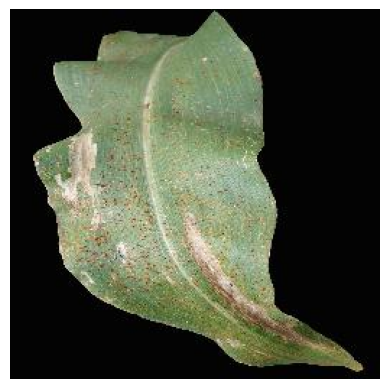

In [16]:
image_path = "plantvillage_dataset/color/Corn_(maize)___Common_rust_/RS_Rust 1563.JPG"

img = mpimg.imread(image_path)

print(img.shape)

plt.imshow(img)
plt.axis('off') # Turn off axis numbers
plt.show()

In [17]:
img_size = 224
batch_size = 32

In [18]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [19]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset="training",
    class_mode="categorical"
)

Found 43456 images belonging to 38 classes.


In [20]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
)

Found 10849 images belonging to 38 classes.


In [22]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

C:\Users\ACER\PycharmProjects\gesture_volume_control\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1270s 931ms/step - accuracy: 0.7470 - loss: 0.8949 - val_accuracy: 0.8542 - val_loss: 0.4585
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1318s 968ms/step - accuracy: 0.9152 - loss: 0.2676 - val_accuracy: 0.8789 - val_loss: 0.3823
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1469s 1s/step - accuracy: 0.9601 - loss: 0.1263 - val_accuracy: 0.8573 - val_loss: 0.5210
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1373s 1s/step - accuracy: 0.9694 - loss: 0.0914 - val_accuracy: 0.8712 - val_loss: 0.5504
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1257s 924ms/step - accuracy: 0.9791 - loss: 0.0645 - val_accuracy: 0.8962 - val_loss: 0.4821


In [27]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 52s 144ms/step - accuracy: 0.8963 - loss: 0.4815
Validation accuracy: 89.63%


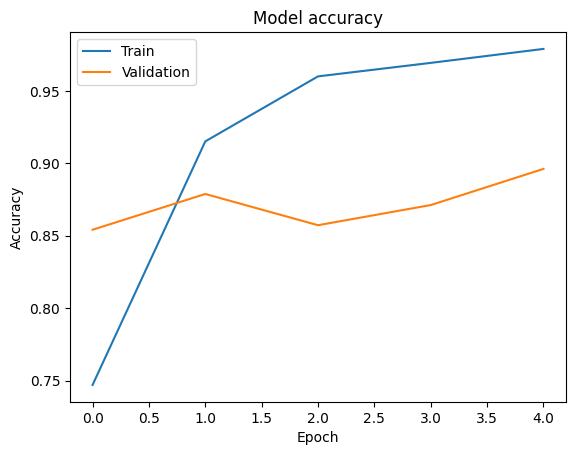

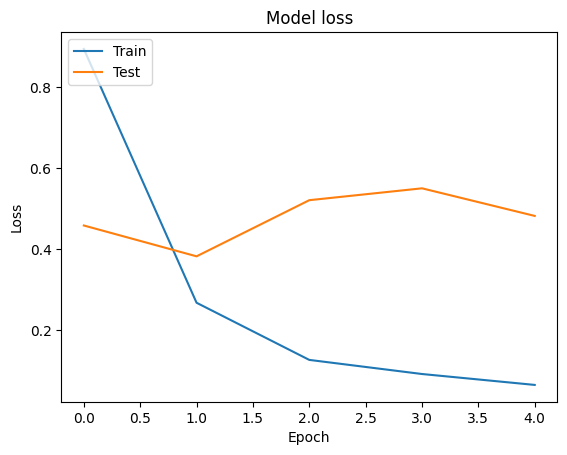

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [32]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [33]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [34]:
json.dump(class_indices, open('class_indices.json','w'))

In [37]:
#Example usage
# image_path = "test_images/test_apple_black_rot.JPG"
# image_path = "test_images/test_blueberry_healthy.jpg"
image_path = "test_images/test_potato_early_blight.jpg"

predicted_class_name = predict_image_class(model, image_path, class_indices)

print("Predicted class name: ", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted class name:  Potato___Early_blight


In [38]:
model.save('plant_diseases_prediction_model.h5')

In [39]:
os.getcwd()

'C:\\Users\\ACER\\PycharmProjects\\plant_diseases_prediction'